In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
discografia = pd.read_csv('thecure_discography.csv', sep = ',')

In [3]:
import seaborn as sns

## Excluindo colunas que não serão utilizadas

In [4]:
discografia.drop(['Unnamed: 0', 'album_uri', 'album_img', 'track_uri'], axis = 1, inplace = True)

# Verificando os 10 primeiros registros

In [5]:
discografia.head(10)

,album_name,album_release_date,album_release_year,album_popularity,track_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,key_mode,track_popularity
0,Pornography,1982-05-03,1982-05-03,34,One Hundred Years - Remastered Version,0.436,0.881,G,-5.998,major,0.0439,0.001230,0.5090,0.1080,0.262,132.590,401000,4,G major,33
1,Pornography,1982-05-03,1982-05-03,34,A Short Term Effect - Remastered Version,0.516,0.836,C,-5.872,major,0.0319,0.001710,0.1650,0.1360,0.649,116.566,262493,4,C major,28
2,Pornography,1982-05-03,1982-05-03,34,The Hanging Garden - Remastered Version,0.420,0.889,C,-5.860,major,0.0393,0.004020,0.4880,0.0795,0.634,135.421,274240,4,C major,35
3,Pornography,1982-05-03,1982-05-03,34,Siamese Twins - Remastered Version,0.772,0.523,D,-9.788,major,0.0364,0.000298,0.7950,0.2820,0.752,94.194,328360,4,D major,34
4,Pornography,1982-05-03,1982-05-03,34,The Figurehead - Remastered Version,0.655,0.842,A#,-5.349,minor,0.0264,0.001250,0.6420,0.1100,0.727,110.370,375173,4,A# minor,28
5,Pornography,1982-05-03,1982-05-03,34,A Strange Day - Remastered Version,0.603,0.964,A,-7.245,minor,0.0430,0.000109,0.0801,0.1190,0.564,112.798,303960,4,A minor,31
6,Pornography,1982-05-03,1982-05-03,34,Cold - Remastered Version,0.473,0.832,A#,-5.841,minor,0.0283,0.091600,0.4980,0.1010,0.238,100.881,266573,4,A# minor,31
7,Pornography,1982-05-03,1982-05-03,34,Pornography - Remastered Version,0.423,0.829,A#,-9.534,major,0.0739,0.435000,0.5300,0.5170,0.205,123.997,387867,4,A# major,25
8,The Top,1984-04-30,1984-04-30,28,Shake Dog Shake - Remastered,0.353,0.914,C,-5.474,major,0.0438,0.011400,0.0119,0.3210,0.158,166.084,296387,4,C major,22
9,The Top,1984-04-30,1984-04-30,28,Birdmad Girl - Remastered,0.760,0.798,B,-8.482,minor,0.0332,0.002720,0.0002,0.0753,0.818,119.770,245413,4,B minor,20


## Verificando os dados estatísticos das colunas

In [6]:
discografia.describe()

,album_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,2.230000e+02,223.000000,223.000000
mean,33.215247,0.520341,0.768982,-8.486027,0.049394,0.149261,0.233470,0.403882,0.503273,129.404668,2.919564e+05,3.955157,22.941704
std,10.637700,0.135878,0.157281,3.847060,0.031209,0.182739,0.295339,0.326814,0.210575,29.393823,1.185817e+05,0.281178,10.092867
min,11.000000,0.175000,0.284000,-24.265000,0.023300,0.000030,0.000000,0.038900,0.042200,74.919000,1.404670e+05,1.000000,0.000000
25%,28.000000,0.431000,0.674500,-11.356000,0.032450,0.012700,0.001285,0.117500,0.343500,108.812000,2.163630e+05,4.000000,17.000000
50%,34.000000,0.528000,0.805000,-7.727000,0.040500,0.067400,0.060600,0.300000,0.506000,128.105000,2.624930e+05,4.000000,22.000000
75%,38.000000,0.608000,0.900000,-5.750500,0.051400,0.218000,0.457000,0.694500,0.658000,150.101500,3.443530e+05,4.000000,28.000000
max,52.000000,0.848000,0.998000,-1.378000,0.267000,0.759000,0.933000,1.000000,0.960000,204.468000,1.286600e+06,5.000000,62.000000


# Criando as funções

In [7]:
def media(variavel):
  media_album = discografia.groupby('album_name').mean()[variavel].to_frame().reset_index()
  media_album = media_album.sort_values(variavel, ascending = False)
  return media_album

In [8]:
def plotar(titulo, x, y, labelx, labely, variavel):
    dataset = media(variavel)
    grafico = sns.barplot(x = x, y = y, data = dataset, palette = 'Blues_d')
    grafico.figure.set_size_inches(12,6)
    grafico.set_title(titulo, fontsize = 18)
    grafico.set_xlabel(labelx, fontsize = 12)
    grafico.set_ylabel(labely, fontsize = 12)
    grafico = grafico

In [9]:
def top_musicas_sup(variavel1):
  max_musica = discografia[['track_name', 'album_name', variavel1]]
  max_musica = max_musica.sort_values(variavel1, ascending = False)
  max_musica = max_musica.head(10)
  return max_musica

In [10]:
def top_musicas_inf(variavel2):
  min_musica = discografia[['track_name', 'album_name', variavel2]]
  min_musica = min_musica.sort_values(variavel2, ascending = True)
  min_musica = min_musica.head(10)
  return min_musica

# Popularidade

### Popularidade por Álbum

In [11]:
media('album_popularity')

,album_name,album_popularity
4,Disintegration (Deluxe Edition [Remastered]),52.0
15,Wish,52.0
6,Kiss Me Kiss Me Kiss Me,40.0
0,4:13 Dream,38.0
7,Mixed Up (Remastered 2018 / Deluxe Edition),37.0
12,The Head On The Door,36.0
9,Pornography,34.0
10,Show,34.0
2,Bloodflowers,31.0
14,Wild Mood Swings,30.0


### Gráfico de Popularidade por Álbum

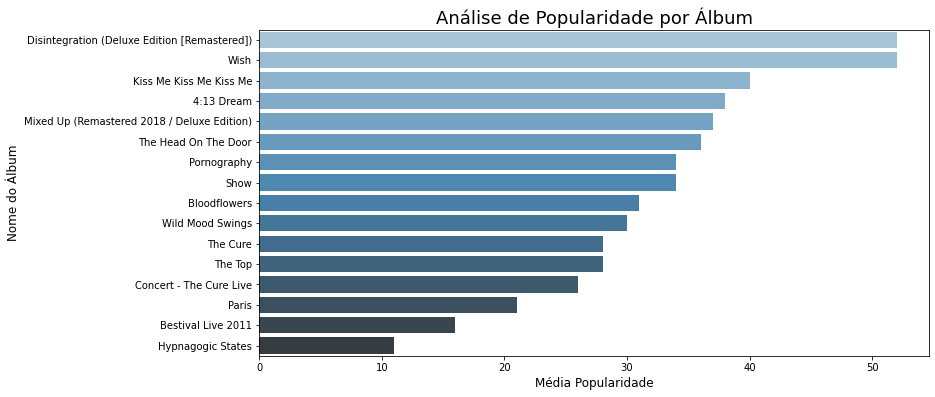

In [12]:
plotar('Análise de Popularidade por Álbum', 'album_popularity', 'album_name', 'Média Popularidade', 'Nome do Álbum', 'album_popularity')

### Top 10 músicas mais populares

In [13]:
top_musicas_sup('track_popularity')

,track_name,album_name,track_popularity
114,Friday I'm In Love,Wish,62
71,Lovesong,Disintegration (Deluxe Edition [Remastered]),58
69,Pictures Of You,Disintegration (Deluxe Edition [Remastered]),52
73,Lullaby,Disintegration (Deluxe Edition [Remastered]),50
74,Fascination Street,Disintegration (Deluxe Edition [Remastered]),49
116,A Letter To Elise,Wish,45
56,Just Like Heaven - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,45
44,Close To Me,The Head On The Door,43
118,To Wish Impossible Things,Wish,41
190,Underneath The Stars,4:13 Dream,41


### Top 10 músicas menos populares

In [14]:
top_musicas_inf('track_popularity')

,track_name,album_name,track_popularity
189,The Only One - Remix 65 by 65 Days Of Static,Hypnagogic States,0
183,The Promise,The Cure,0
220,One Hundred Years - Bestival Live 2011,Bestival Live 2011,4
219,The Hungry Ghost - Bestival Live 2011,Bestival Live 2011,4
221,End - Bestival Live 2011,Bestival Live 2011,4
222,Disintegration - Bestival Live 2011,Bestival Live 2011,5
217,Primary - Bestival Live 2011,Bestival Live 2011,5
215,Play For Today - Bestival Live 2011,Bestival Live 2011,5
218,Shake Dog Shake - Bestival Live 2011,Bestival Live 2011,5
212,Push - Bestival Live 2011,Bestival Live 2011,6


### Análise de popularidade das tracks dos álbuns mais populares

#### Disintegration

In [15]:
musicas_disintegration = discografia.query("album_name=='Disintegration (Deluxe Edition [Remastered])'")[['track_name', 'album_name', 'track_popularity']]
musicas_disintegration = musicas_disintegration.sort_values('track_popularity', ascending = False)

In [16]:
musicas_disintegration

,track_name,album_name,track_popularity
71,Lovesong,Disintegration (Deluxe Edition [Remastered]),58
69,Pictures Of You,Disintegration (Deluxe Edition [Remastered]),52
73,Lullaby,Disintegration (Deluxe Edition [Remastered]),50
74,Fascination Street,Disintegration (Deluxe Edition [Remastered]),49
68,Plainsong,Disintegration (Deluxe Edition [Remastered]),40
77,Disintegration,Disintegration (Deluxe Edition [Remastered]),40
70,Closedown,Disintegration (Deluxe Edition [Remastered]),36
72,Last Dance,Disintegration (Deluxe Edition [Remastered]),35
75,Prayers For Rain,Disintegration (Deluxe Edition [Remastered]),35
76,The Same Deep Water As You,Disintegration (Deluxe Edition [Remastered]),32


In [17]:
media_popularidade_musicas_disintegration = musicas_disintegration.groupby('album_name').mean()[['track_popularity']].reset_index()
media_popularidade_musicas_disintegration

,album_name,track_popularity
0,Disintegration (Deluxe Edition [Remastered]),32.4


#### Wish

In [18]:
musicas_wish = discografia.query("album_name=='Wish'")[['album_name','track_name', 'track_popularity']]
musicas_wish = musicas_wish.sort_values('track_popularity', ascending = False)
musicas_wish

,album_name,track_name,track_popularity
114,Wish,Friday I'm In Love,62
116,Wish,A Letter To Elise,45
118,Wish,To Wish Impossible Things,41
109,Wish,High,40
111,Wish,From The Edge Of The Deep Green Sea,37
108,Wish,Open,36
110,Wish,Apart,30
113,Wish,Doing The Unstuck,30
115,Wish,Trust,30
117,Wish,Cut,28


In [19]:
media_popularidade_musicas_wish = musicas_wish.groupby('album_name').mean()[['track_popularity']].reset_index()
media_popularidade_musicas_wish

,album_name,track_popularity
0,Wish,36


#### Kiss Me Kiss Me Kiss Me

In [20]:
musicas_kissme = discografia.query("album_name=='Kiss Me Kiss Me Kiss Me'")[['track_name', 'album_name', 'track_popularity']]
musicas_kissme = musicas_kissme.sort_values('track_popularity', ascending = False)
musicas_kissme

,track_name,album_name,track_popularity
56,Just Like Heaven - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,45
53,How Beautiful You Are - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,35
52,Why Can't I Be You? - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,32
48,The Kiss - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,31
49,Catch - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,30
58,Hot Hot Hot !!! - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,30
51,If Only Tonight We Could Sleep - 2006 Remaster...,Kiss Me Kiss Me Kiss Me,27
57,All I Want - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,27
62,The Perfect Girl - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,27
59,One More Time - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,26


In [21]:
media_popularidade_musicas_kissme = musicas_kissme.groupby('album_name').mean()[['track_popularity']].reset_index()
media_popularidade_musicas_kissme

,album_name,track_popularity
0,Kiss Me Kiss Me Kiss Me,26.35


#### Dataset dos 3 álbuns mais populares comparando a média de popularidade de suas músicas com a popularidade do álbum

In [22]:
media_popularidade_comparativa = pd.concat([media_popularidade_musicas_disintegration, media_popularidade_musicas_wish, media_popularidade_musicas_kissme]).reset_index()
media_popularidade_comparativa

,index,album_name,track_popularity
0,0,Disintegration (Deluxe Edition [Remastered]),32.40
1,0,Wish,36.00
2,0,Kiss Me Kiss Me Kiss Me,26.35


# Dançabilidade

### Média de Dançabilidade por Álbum

In [23]:
media('danceability')

,album_name,danceability
12,The Head On The Door,0.640600
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.626650
13,The Top,0.594250
1,Bestival Live 2011,0.575400
5,Hypnagogic States,0.569833
9,Pornography,0.537250
14,Wild Mood Swings,0.530286
2,Bloodflowers,0.498333
6,Kiss Me Kiss Me Kiss Me,0.498050
11,The Cure,0.491545


### Gráfico da Média de Dançabilidade por Álbum

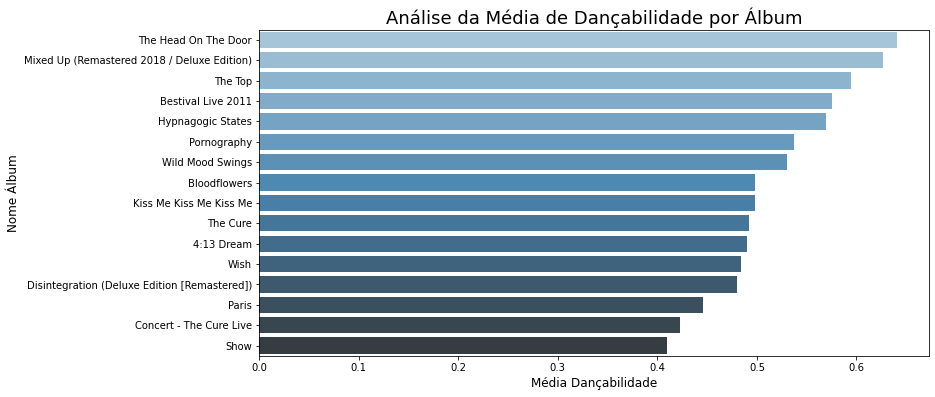

In [24]:
plotar('Análise da Média de Dançabilidade por Álbum', 'danceability', 'album_name', 'Média Dançabilidade', 'Nome Álbum', 'danceability')

### Top 10 músicas com maior dançabilidade

In [25]:
top_musicas_sup('danceability')

,track_name,album_name,danceability
17,The Top - Remastered,The Top,0.848
99,Let's Go To Bed - Extended Mix 1982,Mixed Up (Remastered 2018 / Deluxe Edition),0.828
24,Birdmad Girl [Garden /Eden Studios RS&AA Demo ...,The Top,0.806
41,Six Different Ways,The Head On The Door,0.781
3,Siamese Twins - Remastered Version,Pornography,0.772
95,Hot Hot Hot!!! - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.772
187,The Perfect Boy - Remix 4 by Patrick Stump / P...,Hypnagogic States,0.770
27,Happy The Man [Garden /Eden Studios RS&AA Demo...,The Top,0.762
96,The Caterpillar - Flicker Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.762
9,Birdmad Girl - Remastered,The Top,0.760


### Top 10 músicas com menor dançabilidade

In [26]:
top_musicas_inf('danceability')

,track_name,album_name,danceability
203,Plainsong - Bestival Live 2011,Bestival Live 2011,0.175
32,Give Me It - Live Version (1984),Concert - The Cure Live,0.207
86,Esten [Band Demo (instrumental)-09/88],Disintegration (Deluxe Edition [Remastered]),0.220
133,"Open - Live At The Palace, Auburn Hills, Michigan",Show,0.223
124,Apart - Live Paris Version,Paris,0.230
190,Underneath The Stars,4:13 Dream,0.231
148,"Cut - Live At The Palace, Auburn Hills, Michigan",Show,0.242
83,Homesick [Band Rehearsal (instrumental)-06/88],Disintegration (Deluxe Edition [Remastered]),0.250
119,End,Wish,0.258
37,Killing An Arab - New Version / Live Version (...,Concert - The Cure Live,0.263


# Energia

### Média de Energia por Álbum

In [27]:
media('energy')

,album_name,energy
11,The Cure,0.920000
0,4:13 Dream,0.883846
1,Bestival Live 2011,0.874800
5,Hypnagogic States,0.851667
9,Pornography,0.824500
14,Wild Mood Swings,0.804214
3,Concert - The Cure Live,0.790900
6,Kiss Me Kiss Me Kiss Me,0.785900
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.776300
2,Bloodflowers,0.768000


### Gráfico de Energia por Álbum

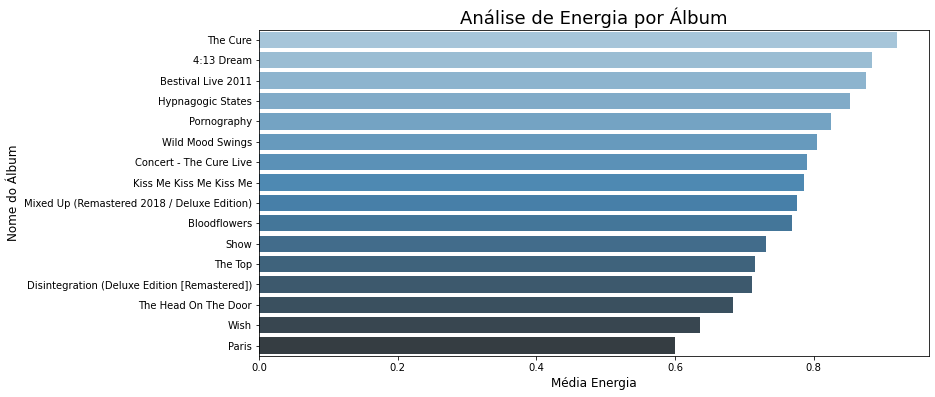

In [28]:
plotar('Análise de Energia por Álbum', 'energy', 'album_name', 'Média Energia', 'Nome do Álbum', 'energy')

### Top 10 músicas com mais energia

In [29]:
top_musicas_sup('energy')

,track_name,album_name,energy
202,It's Over,4:13 Dream,0.998
201,The Scream,4:13 Dream,0.982
178,Us Or Them,The Cure,0.978
151,Club America,Wild Mood Swings,0.978
11,Give Me It - Remastered,The Top,0.973
32,Give Me It - Live Version (1984),Concert - The Cure Live,0.971
200,Sleep When I'm Dead,4:13 Dream,0.970
25,Give Me It [Garden /Eden Studios RS&AA Demo 12...,The Top,0.968
197,Switch,4:13 Dream,0.965
5,A Strange Day - Remastered Version,Pornography,0.964


### Top 10 músicas com menos energia

In [30]:
top_musicas_inf('energy')

,track_name,album_name,energy
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,0.284
118,To Wish Impossible Things,Wish,0.297
44,Close To Me,The Head On The Door,0.341
115,Trust,Wish,0.367
120,The Figurehead - Live Paris Version,Paris,0.395
96,The Caterpillar - Flicker Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.399
140,"Trust - Live At The Palace, Auburn Hills, Mich...",Show,0.400
68,Plainsong,Disintegration (Deluxe Edition [Remastered]),0.428
110,Apart,Wish,0.433
51,If Only Tonight We Could Sleep - 2006 Remaster...,Kiss Me Kiss Me Kiss Me,0.439


# Volume geral em decibéis

### Média geral de decibéis por álbum

In [31]:
media('loudness')

,album_name,loudness
0,4:13 Dream,-3.061308
11,The Cure,-4.048182
14,Wild Mood Swings,-4.509643
5,Hypnagogic States,-5.411167
1,Bestival Live 2011,-5.977250
2,Bloodflowers,-6.363111
9,Pornography,-6.935875
6,Kiss Me Kiss Me Kiss Me,-7.554100
13,The Top,-8.185500
7,Mixed Up (Remastered 2018 / Deluxe Edition),-8.584050


### Gráfico de decibéis por álbum

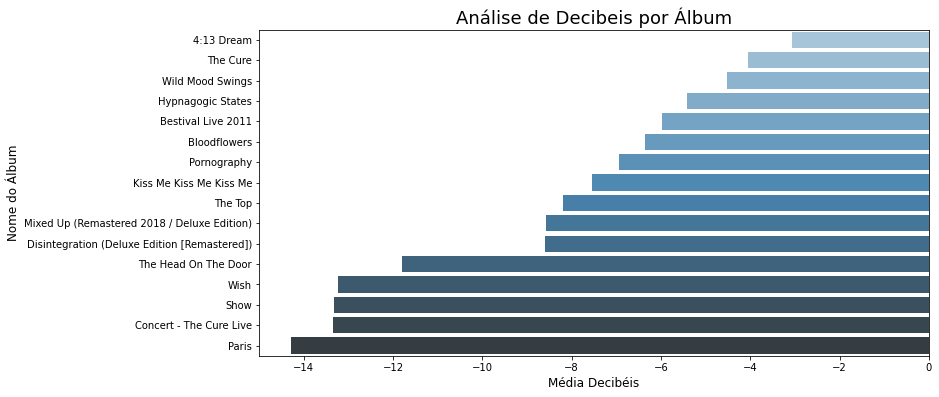

In [32]:
plotar('Análise de Decibeis por Álbum', 'loudness', 'album_name', 'Média Decibéis', 'Nome do Álbum', 'loudness')

### Top 10 músicas mais suaves

In [33]:
top_musicas_inf('loudness')

,track_name,album_name,loudness
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,-24.265
118,To Wish Impossible Things,Wish,-19.624
44,Close To Me,The Head On The Door,-17.927
120,The Figurehead - Live Paris Version,Paris,-17.460
115,Trust,Wish,-16.847
126,Love Song,Paris,-15.940
110,Apart,Wish,-15.933
124,Apart - Live Paris Version,Paris,-15.354
125,In Your House - Live Paris Version,Paris,-15.174
131,Close To Me - Live Paris Version,Paris,-15.009


### Top 10 músicas menos suaves

In [34]:
top_musicas_sup('loudness')

,track_name,album_name,loudness
202,It's Over,4:13 Dream,-1.378
200,Sleep When I'm Dead,4:13 Dream,-1.677
195,The Real Snow White,4:13 Dream,-1.705
197,Switch,4:13 Dream,-1.786
182,Never,The Cure,-2.161
191,The Only One,4:13 Dream,-2.414
157,Round & Round & Round,Wild Mood Swings,-2.538
196,The Hungry Ghost,4:13 Dream,-2.588
160,Return,Wild Mood Swings,-2.791
201,The Scream,4:13 Dream,-2.841


# Palavras cantadas

### Média de palavras cantadas por álbum

In [35]:
media('speechiness')

,album_name,speechiness
5,Hypnagogic States,0.078467
0,4:13 Dream,0.078423
3,Concert - The Cure Live,0.059970
10,Show,0.054150
14,Wild Mood Swings,0.052629
11,The Cure,0.050555
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.050140
6,Kiss Me Kiss Me Kiss Me,0.049265
1,Bestival Live 2011,0.046835
13,The Top,0.046370


### Gráfico da média de palavras cantadas por álbum

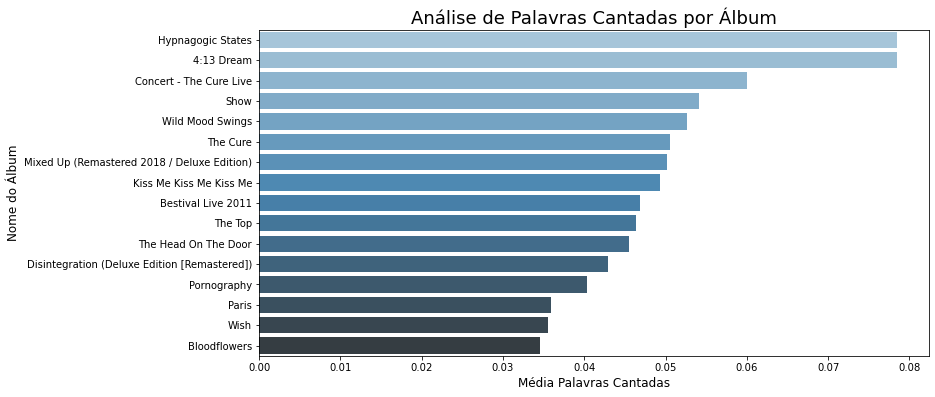

In [36]:
plotar('Análise de Palavras Cantadas por Álbum', 'speechiness', 'album_name', 'Média Palavras Cantadas', 'Nome do Álbum', 'speechiness')

### Top 10 músicas com mais palavras cantadas

In [37]:
top_musicas_sup('speechiness')

,track_name,album_name,speechiness
66,The Kiss [RS Home Demo 3/86] [Instrumental],Kiss Me Kiss Me Kiss Me,0.267
201,The Scream,4:13 Dream,0.248
202,It's Over,4:13 Dream,0.168
11,Give Me It - Remastered,The Top,0.161
101,Close To Me - Extended Mix 1985,Mixed Up (Remastered 2018 / Deluxe Edition),0.134
200,Sleep When I'm Dead,4:13 Dream,0.133
189,The Only One - Remix 65 by 65 Days Of Static,Hypnagogic States,0.130
197,Switch,4:13 Dream,0.123
44,Close To Me,The Head On The Door,0.123
151,Club America,Wild Mood Swings,0.113


### Top 10 músicas com menos palavras cantadas

In [38]:
top_musicas_inf('speechiness')

,track_name,album_name,speechiness
15,The Empty World - Remastered,The Top,0.0233
23,Piggy In The Mirror [Garden /Eden Studios RS&A...,The Top,0.0236
170,The Loudest Sound,Bloodflowers,0.0239
54,The Snakepit - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,0.0250
51,If Only Tonight We Could Sleep - 2006 Remaster...,Kiss Me Kiss Me Kiss Me,0.0257
78,Homesick,Disintegration (Deluxe Edition [Remastered]),0.0258
81,Pictures Of You [RS Home Demo (instrumental)-0...,Disintegration (Deluxe Edition [Remastered]),0.0263
4,The Figurehead - Remastered Version,Pornography,0.0264
140,"Trust - Live At The Palace, Auburn Hills, Mich...",Show,0.0264
75,Prayers For Rain,Disintegration (Deluxe Edition [Remastered]),0.0270


# Acústica

### Calculando a média de índice acústico por álbum

In [39]:
media('acousticness')

,album_name,acousticness
4,Disintegration (Deluxe Edition [Remastered]),0.260964
12,The Head On The Door,0.260002
10,Show,0.226317
14,Wild Mood Swings,0.214075
6,Kiss Me Kiss Me Kiss Me,0.205115
15,Wish,0.188874
3,Concert - The Cure Live,0.158653
13,The Top,0.122983
0,4:13 Dream,0.115023
2,Bloodflowers,0.092112


### Gráfico da média de índice acústico por álbum

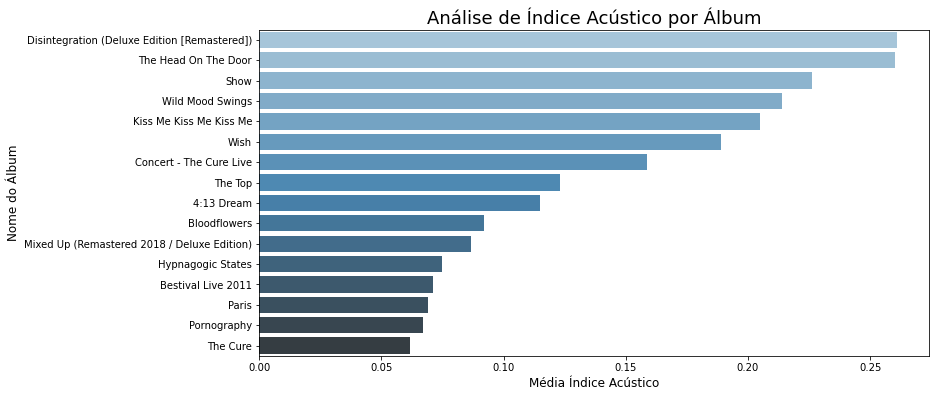

In [40]:
plotar('Análise de Índice Acústico por Álbum', 'acousticness', 'album_name', 'Média Índice Acústico', 'Nome do Álbum', 'acousticness')

### Top 10 músicas com maior índice acústico

In [41]:
top_musicas_sup('acousticness')

,track_name,album_name,acousticness
153,The 13th,Wild Mood Swings,0.759
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,0.747
136,"Lullaby - Live At The Palace, Auburn Hills, Mi...",Show,0.709
83,Homesick [Band Rehearsal (instrumental)-06/88],Disintegration (Deluxe Edition [Remastered]),0.677
27,Happy The Man [Garden /Eden Studios RS&AA Demo...,The Top,0.642
84,Fear Of Ghosts [Band Rehearsal (instrumental)-...,Disintegration (Deluxe Edition [Remastered]),0.636
43,The Baby Screams,The Head On The Door,0.627
118,To Wish Impossible Things,Wish,0.608
162,Treasure,Wild Mood Swings,0.600
79,Untitled,Disintegration (Deluxe Edition [Remastered]),0.571


### Top 10 músicas com menos índice acústico

In [42]:
top_musicas_inf('acousticness')

,track_name,album_name,acousticness
11,Give Me It - Remastered,The Top,0.000030
25,Give Me It [Garden /Eden Studios RS&AA Demo 12...,The Top,0.000078
21,Sadacic [Olympic Studio RS Demo 12/83],The Top,0.000099
5,A Strange Day - Remastered Version,Pornography,0.000109
91,The Walk - Everything Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.000121
107,Just Like Heaven - Dizzy Mix 1990,Mixed Up (Remastered 2018 / Deluxe Edition),0.000130
90,Fascination Street - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.000183
3,Siamese Twins - Remastered Version,Pornography,0.000298
165,Watching Me Fall,Bloodflowers,0.000299
185,Freakshow - Wolves At The Gate Remix by Jade P...,Hypnagogic States,0.000470


# Instrumentalidade

### Média de instrumentalidade por álbum

In [43]:
media('instrumentalness')

,album_name,instrumentalness
4,Disintegration (Deluxe Edition [Remastered]),0.539580
9,Pornography,0.463387
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.329865
13,The Top,0.281363
8,Paris,0.268283
6,Kiss Me Kiss Me Kiss Me,0.223575
12,The Head On The Door,0.210142
1,Bestival Live 2011,0.207517
5,Hypnagogic States,0.194343
10,Show,0.172449


### Gráfico da média de instrumentalidade por álbum

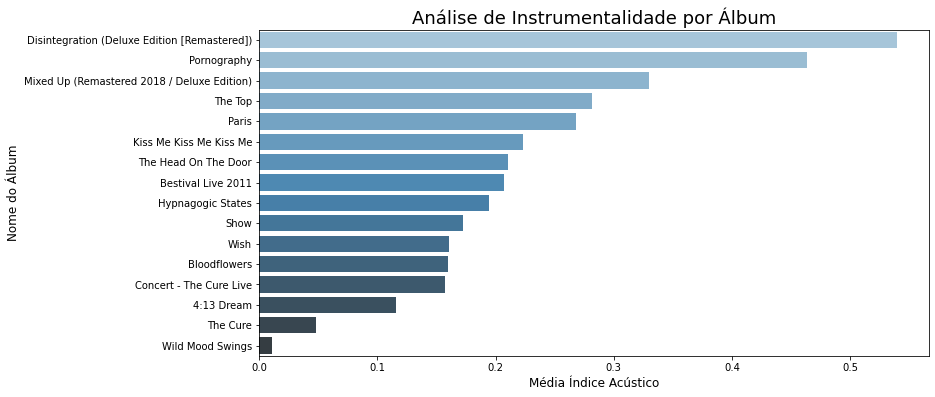

In [44]:
plotar('Análise de Instrumentalidade por Álbum', 'instrumentalness', 'album_name', 'Média Índice Acústico', 'Nome do Álbum', 'instrumentalness')

### Top 10 músicas com maior instrumentalidade

In [45]:
top_musicas_sup('instrumentalness')

,track_name,album_name,instrumentalness
100,Just One Kiss - Extended Mix 1982,Mixed Up (Remastered 2018 / Deluxe Edition),0.933
81,Pictures Of You [RS Home Demo (instrumental)-0...,Disintegration (Deluxe Edition [Remastered]),0.931
132,"Tape - Live At The Palace, Auburn Hills, Michigan",Show,0.903
71,Lovesong,Disintegration (Deluxe Edition [Remastered]),0.898
140,"Trust - Live At The Palace, Auburn Hills, Mich...",Show,0.896
67,The Perfect Girl [Beethoven St. Studio Demo 6/...,Kiss Me Kiss Me Kiss Me,0.884
86,Esten [Band Demo (instrumental)-09/88],Disintegration (Deluxe Edition [Remastered]),0.880
84,Fear Of Ghosts [Band Rehearsal (instrumental)-...,Disintegration (Deluxe Edition [Remastered]),0.874
93,A Forest - Tree Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.873
80,Prayers For Rain [RS Home Demo (instrumental)-...,Disintegration (Deluxe Edition [Remastered]),0.858


### Top 10 músicas com menor instrumentalidade

In [46]:
top_musicas_inf('instrumentalness')

,track_name,album_name,instrumentalness
117,Cut,Wish,0.0
187,The Perfect Boy - Remix 4 by Patrick Stump / P...,Hypnagogic States,0.0
198,The Perfect Boy,4:13 Dream,0.0
199,This. Here And Now. With You,4:13 Dream,0.0
179,alt.end,The Cure,0.0
176,The End Of The World,The Cure,0.0
141,"Doing The Unstuck - Live At The Palace, Auburn...",Show,0.0
143,"Let's Go To Bed - Live At The Palace, Auburn H...",Show,0.0
14,Piggy In The Mirror - Remastered,The Top,0.0
154,Strange Attraction,Wild Mood Swings,0.0


# Índice de presença de público

### Média de índice de presença de público por álbum

In [47]:
media('liveness')

,album_name,liveness
8,Paris,0.980417
10,Show,0.829889
1,Bestival Live 2011,0.825100
3,Concert - The Cure Live,0.747200
6,Kiss Me Kiss Me Kiss Me,0.338290
5,Hypnagogic States,0.301900
14,Wild Mood Swings,0.286521
11,The Cure,0.255964
13,The Top,0.246745
15,Wish,0.245667


### Gráfico da média do índice de presença de público por álbum

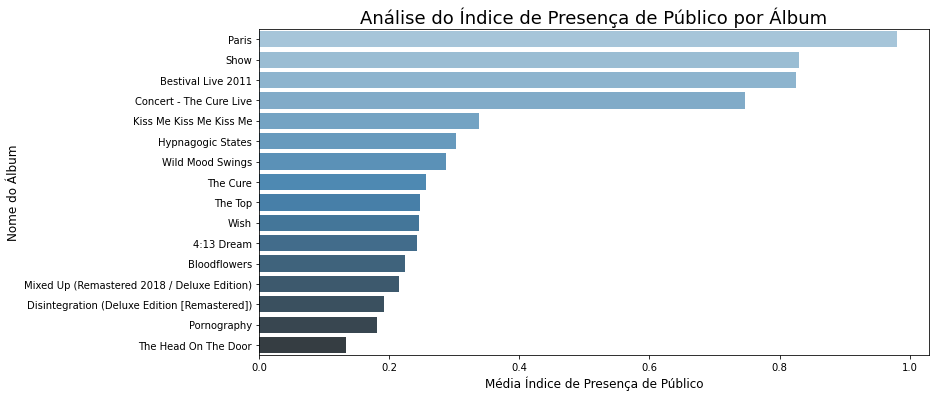

In [48]:
plotar('Análise do Índice de Presença de Público por Álbum', 'liveness', 'album_name', 'Média Índice de Presença de Público', 'Nome do Álbum', 'liveness')

### Top 10 músicas com maior índice de presença de público

In [49]:
top_musicas_sup('liveness')

,track_name,album_name,liveness
130,Charlotte Sometimes - Live Paris Version,Paris,1.000
211,The Walk - Bestival Live 2011,Bestival Live 2011,0.997
125,In Your House - Live Paris Version,Paris,0.993
131,Close To Me - Live Paris Version,Paris,0.992
122,At Night - Live Paris Version,Paris,0.991
220,One Hundred Years - Bestival Live 2011,Bestival Live 2011,0.988
217,Primary - Bestival Live 2011,Bestival Live 2011,0.988
36,10:15 Saturday Night - New Version / Live Vers...,Concert - The Cure Live,0.988
121,One Hundred Years - Live Paris Version,Paris,0.987
222,Disintegration - Bestival Live 2011,Bestival Live 2011,0.984


### Top 10 músicas com menor índice de presença de público

In [50]:
top_musicas_inf('liveness')

,track_name,album_name,liveness
88,Lullaby - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0389
58,Hot Hot Hot !!! - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,0.0426
94,Pictures Of You - Extended Dub Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0543
73,Lullaby,Disintegration (Deluxe Edition [Remastered]),0.0550
99,Let's Go To Bed - Extended Mix 1982,Mixed Up (Remastered 2018 / Deluxe Edition),0.0551
109,High,Wish,0.0594
90,Fascination Street - Extended Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0596
89,Close To Me - Closer Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.0602
177,Anniversary,The Cure,0.0656
163,Bare,Wild Mood Swings,0.0710


# Valência

### Média de valência por álbum

In [51]:
media('valence')

,album_name,valence
12,The Head On The Door,0.728900
7,Mixed Up (Remastered 2018 / Deluxe Edition),0.661900
6,Kiss Me Kiss Me Kiss Me,0.558050
13,The Top,0.550750
14,Wild Mood Swings,0.507571
9,Pornography,0.503875
15,Wish,0.495000
0,4:13 Dream,0.479515
5,Hypnagogic States,0.477667
4,Disintegration (Deluxe Edition [Remastered]),0.467750


### Gráfico da média de valência por álbum

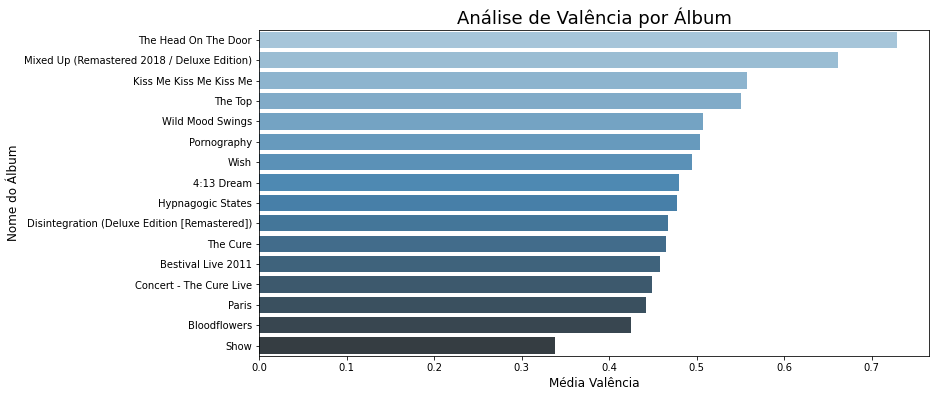

In [52]:
plotar('Análise de Valência por Álbum', 'valence', 'album_name', 'Média Valência', 'Nome do Álbum', 'valence')

### Top 10 músicas com maior valência

In [53]:
top_musicas_sup('valence')

,track_name,album_name,valence
44,Close To Me,The Head On The Door,0.960
101,Close To Me - Extended Mix 1985,Mixed Up (Remastered 2018 / Deluxe Edition),0.948
26,Throw Your Foot [Garden /Eden Studios RS&AA De...,The Top,0.944
43,The Baby Screams,The Head On The Door,0.882
131,Close To Me - Live Paris Version,Paris,0.881
13,The Caterpillar - Remastered Version,The Top,0.870
193,Freakshow,4:13 Dream,0.869
93,A Forest - Tree Mix,Mixed Up (Remastered 2018 / Deluxe Edition),0.864
27,Happy The Man [Garden /Eden Studios RS&AA Demo...,The Top,0.864
55,Hey You !!! - 2006 Remastered Version,Kiss Me Kiss Me Kiss Me,0.864


### Top 10 músicas com menor valência

In [54]:
top_musicas_inf('valence')

,track_name,album_name,valence
32,Give Me It - Live Version (1984),Concert - The Cure Live,0.0422
201,The Scream,4:13 Dream,0.0447
75,Prayers For Rain,Disintegration (Deluxe Edition [Remastered]),0.1080
66,The Kiss [RS Home Demo 3/86] [Instrumental],Kiss Me Kiss Me Kiss Me,0.1120
220,One Hundred Years - Bestival Live 2011,Bestival Live 2011,0.1240
68,Plainsong,Disintegration (Deluxe Edition [Remastered]),0.1250
77,Disintegration,Disintegration (Deluxe Edition [Remastered]),0.1250
11,Give Me It - Remastered,The Top,0.1290
17,The Top - Remastered,The Top,0.1330
188,Exploding Head Syndrome - 4 Single Remix by 65...,Hypnagogic States,0.1410


In [55]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('THE_CURE_Analise_da_Discografia.ipynb')